## Download COVID Data from the Web and Process it ##

__The webpages are embedded in the code below__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Confirmed Covid Cases by Country

In [2]:
# The confirmed cases by country
data_url1 = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'
            '/time_series_covid19_confirmed_global.csv')

df_cases = pd.read_csv(data_url1)

#Write to local CSV
df_cases.to_csv('covid-19-cases.csv')

Confirmed Covid Deaths by Country

In [11]:
# The number of deaths by country
data_url2 = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'
            '/time_series_covid19_deaths_global.csv')
df_deaths = pd.read_csv(data_url2)

#Write to local CSV
df_deaths.to_csv('covid-19-deaths.csv')

In [12]:
#Clean the Data. Disambiguate the Nationz
alias_nations = {
    'Cabo Verde': 'Cape Verde',
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'DR Congo',
    "Cote d'Ivoire": 'Ivory Coast',
    'Czechia': 'Czech Republic',
    'Holy See': 'Vatican City',
    'Korea, South': 'South Korea',
    'Taiwan*': 'Taiwan',
    'US': 'United States',
    'Timor-Leste': 'East Timor',
    'West Bank and Gaza': 'Palestine',
}

In [13]:
# Populations : Note how cool Pandas is in reading table data from the web
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
df_pops = pd.read_html(url, header = 0)[0]
df_pops.head()

,Rank,Country(or dependent territory),Population,% of world,Date,Source(official or UN)
0,1,China[b],1406792720,17.9%,24 Feb 2021,National population clock[3]
1,2,India[c],1373741960,17.5%,24 Feb 2021,National population clock[4]
2,3,United States[d],331221802,4.22%,24 Feb 2021,National population clock[5]
3,4,Indonesia,270203917,3.44%,30 Sep 2020,2020 census result[6]
4,5,Pakistan[e],225200000,2.87%,1 Jul 2021,UN Projection[2]


In [14]:
# shorten the name
df_pops.rename(columns={'Country(or dependent territory)': 'Country'}, inplace=True)

In [15]:
# Remove footnote 
df_pops['Country'] = df_pops['Country'].str.replace('\[\w\]', '')

In [16]:
df_pops.head()

,Rank,Country,Population,% of world,Date,Source(official or UN)
0,1,China,1406792720,17.9%,24 Feb 2021,National population clock[3]
1,2,India,1373741960,17.5%,24 Feb 2021,National population clock[4]
2,3,United States,331221802,4.22%,24 Feb 2021,National population clock[5]
3,4,Indonesia,270203917,3.44%,30 Sep 2020,2020 census result[6]
4,5,Pakistan,225200000,2.87%,1 Jul 2021,UN Projection[2]


In [17]:
# Set the 'Country' column to be the index.
df_pops.index = df_pops['Country']

In [18]:
df_pops.head()

,Rank,Country,Population,% of world,Date,Source(official or UN)
Country,,,,,,
China,1,China,1406792720,17.9%,24 Feb 2021,National population clock[3]
India,2,India,1373741960,17.5%,24 Feb 2021,National population clock[4]
United States,3,United States,331221802,4.22%,24 Feb 2021,National population clock[5]
Indonesia,4,Indonesia,270203917,3.44%,30 Sep 2020,2020 census result[6]
Pakistan,5,Pakistan,225200000,2.87%,1 Jul 2021,UN Projection[2]


In [19]:
df_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584


In [20]:
# Get the unique country names affected by COVID-19
covid_countries = df_cases['Country/Region'].unique()
len(covid_countries)

192

In [23]:
#use the covid countries list and 
#write out the country with their populations to a CSV for reference. 
#Clean up non-existent countries like cruise ships

In [24]:
f = open('country_pops.csv', 'w')
print('Country, Population', file=f)
for country in covid_countries:
    if country not in df_pops.index:
        try:
             print('{}, {}'.format(alias_nations[country], df_pops.loc[alias_nations[country], 'Population']), file=f)
            #print(country_aliases[country], df.loc[country_aliases[country], 'Population'])
        except:
            print('Not found: ', country)
            continue
    else:
        print('{}, {}'.format(country, df_pops.loc[country,'Population']), file=f)
        #print(country, df.loc[country,'Population'])
f.close()

Not found:  Burma
Not found:  Diamond Princess
Not found:  Holy See
Not found:  MS Zaandam
Not found:  Micronesia
Not found:  Sao Tome and Principe


In [25]:
df_cases.rename(columns={'Country/Region': 'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [26]:
df_cases.groupby('Country').sum().head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584


In [27]:
df_case_agg = df_cases.groupby('Country').sum()
df_case_agg.rename(index = alias_nations, inplace = True)

df_deaths_agg = df_deaths.groupby('Country').sum()
df_deaths_agg.rename(index = alias_nations, inplace = True)

In [28]:
def country_plot(dataf, country, MIN_CASES, status ):
    
    # Extract the Series corresponding to the case numbers for country.
    c_df = dataf.loc[country, dataf.columns[3:]].astype(int)
    c_df.index = pd.to_datetime(c_df.index)
    c_df = c_df[c_df >= MIN_CASES]
    n = len(c_df)
    if n == 0:
        print('Too few data to plot: minimum number is {}'.format(MIN_CASES))
        sys.exit(-1)
    fig = plt.Figure()

    
    # Arrange the subplots on a grid: the top plot (case number change) is
    # one quarter the height of the bar chart (total confirmed case numbers).
    #ax2 = plt.subplot2grid((4,1), (0,0))
    ax1 = plt.subplot2grid((4,1), (1,0), rowspan=3)
    ax1.bar(range(n), c_df.values)

    # Force the x-axis to be in integers (whole number of days) in case
    # Matplotlib chooses some non-integral number of days to label).
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    c_df_change = c_df.diff()
    #ax2.bar(range(n), c_df_change.values)
    #ax2.set_xticks([])

    ax1.set_xlabel('Days since {} {} were found'.format(MIN_CASES, status))
    ax1.set_ylabel('Number of {}, $N$'.format(status))
    #ax2.set_ylabel('$\Delta N$')

    # Add a title reporting the latest number of cases available.
    title = '{}\n{} on {}'.format(country, c_df[-1], c_df.index[-1].strftime('%d %B %Y'))
    plt.suptitle(title)
    plt.show()

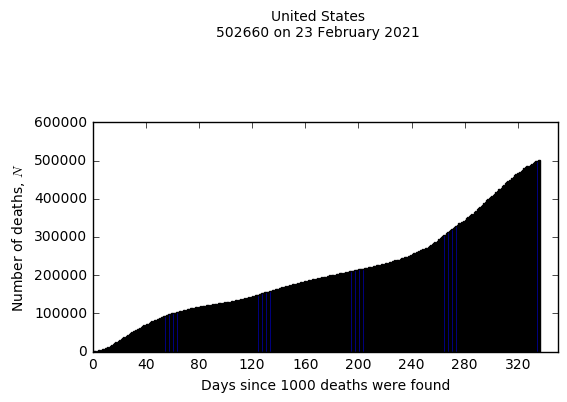

In [29]:
import sys
from matplotlib.ticker import MaxNLocator
MIN_CASES = 1000
country = 'United States'
country_plot(df_deaths_agg, 'United States', MIN_CASES, 'deaths')

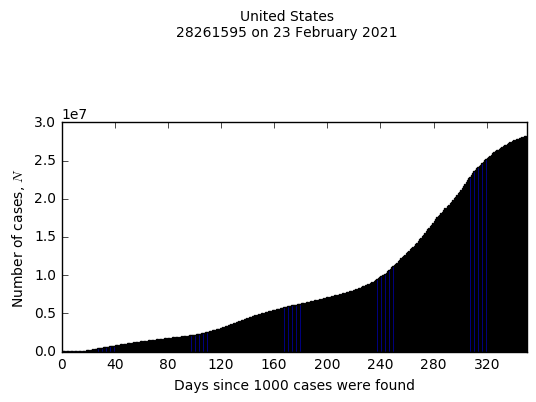

In [30]:
country_plot(df_case_agg, 'United States', MIN_CASES, 'cases')

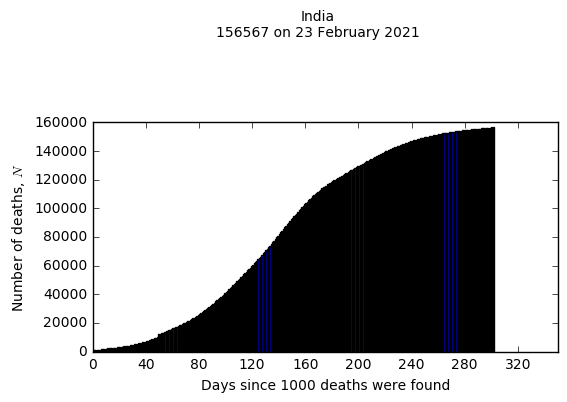

In [31]:
country_plot(df_deaths_agg, 'India', MIN_CASES, 'deaths')

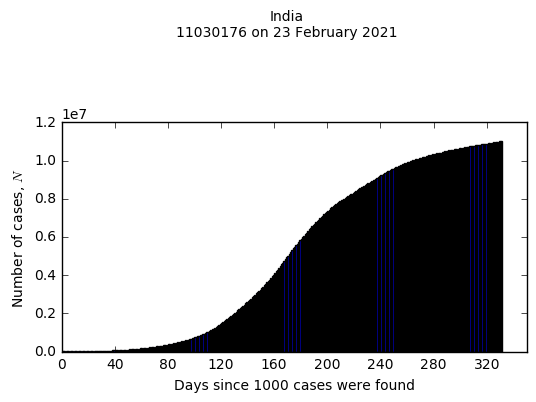

In [32]:
country_plot(df_case_agg, 'India', MIN_CASES, 'cases')